In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Define base directory
base_dir = "/Users/bilalnajar/PycharmProjects/capstone/waterfall"

img_size = 64

# Define selected categories for proof of concept
selected_categories = [
    "fm",
    "bluetooth",
    "digital-audio-broadcasting",
    "z-wave",
    "RS41-Radiosonde"
]

# Load only selected categories
images = []
labels = []

for category in selected_categories:
    category_path = os.path.join(base_dir, category)
    if not os.path.isdir(category_path):
        print(f"Skipping missing category: {category}")
        continue

    for img_name in os.listdir(category_path):
        try:
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            images.append(img.flatten())
            labels.append(category)
        except Exception as e:
            print(f"Error loading image {img_name} from {category}: {e}")
            
# Proceed with training if any images were loaded
if images:
    le = LabelEncoder()
    y = le.fit_transform(labels)

    X = np.array(images)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, stratify=y, random_state=27
    )

    # Train SVM
    svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
    svm_model.fit(X_train, y_train)

    # Evaluate
    y_pred = svm_model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=le.classes_)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)

else:
    print("Image loading failed or no images found.")

Classification Report:
                             precision    recall  f1-score   support

           RS41-Radiosonde       0.68      0.47      0.56        55
                 bluetooth       0.77      0.64      0.70        42
digital-audio-broadcasting       1.00      1.00      1.00        13
                        fm       0.73      0.91      0.81       148
                    z-wave       0.67      0.49      0.56        41

                  accuracy                           0.74       299
                 macro avg       0.77      0.70      0.73       299
              weighted avg       0.73      0.74      0.72       299

Confusion Matrix:
 [[ 26   3   0  26   0]
 [  7  27   0   8   0]
 [  0   0  13   0   0]
 [  3   1   0 134  10]
 [  2   4   0  15  20]]


| Class                      | Precision | Recall | F1   | Notes                                      |
|---------------------------|-----------|--------|------|--------------------------------------------|
| RS41-Radiosonde           | 0.68      | 0.47   | 0.56 | Misclassified heavily as fm                |
| bluetooth                 | 0.77      | 0.64   | 0.70 | Some overlap with fm, but good overall     |
| digital-audio-broadcasting| 1.00      | 1.00   | 1.00 | Perfect separation — very distinctive      |
| fm                        | 0.73      | 0.91   | 0.81 | Strong performance — well represented      |
| z-wave                    | 0.67      | 0.49   | 0.56 | Often confused with fm                     |

# Baseline SVG Model Based on all Categories with More than 5 samples

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Define base directory
base_dir = "/Users/bilalnajar/PycharmProjects/capstone/waterfall"

img_size = 64

# Dynamically discover all categories in the base directory (excluding 'unknown')
all_categories = [
    category for category in os.listdir(base_dir)
    if os.path.isdir(os.path.join(base_dir, category)) and category.lower() != "unknown"
]

# Collect image paths by category
from collections import defaultdict

category_images = defaultdict(list)
for category in all_categories:
    category_path = os.path.join(base_dir, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        category_images[category].append(img_path)

# Determine the minimum sample size available among all categories
# Filter out tiny classes
min_required = 5
category_images = {k: v for k, v in category_images.items() if len(v) >= min_required}
min_samples = min(len(paths) for paths in category_images.values())

# Load and preprocess balanced dataset
images = []
labels = []
for category, paths in category_images.items():
    for img_path in paths[:min_samples]:
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            images.append(img.flatten())
            labels.append(category)
        except Exception as e:
            print(f"Error loading image {img_path} from {category}: {e}")

# Proceed with training if any images were loaded
if images:
    le = LabelEncoder()
    y = le.fit_transform(labels)

    X = np.array(images)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, stratify=y, random_state=27
    )

    # Train SVM
    svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
    svm_model.fit(X_train, y_train)

    # Evaluate
    y_pred = svm_model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=le.classes_)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)

else:
    print("Image loading failed or no images found.")


Classification Report:
                                 precision    recall  f1-score   support

                         16QAM       0.00      0.00      0.00         1
                          2ASK       0.00      0.00      0.00         1
                         32QAM       1.00      1.00      1.00         1
                          4FSK       0.00      0.00      0.00         1
                          8PSK       0.00      0.00      0.00         1
               RS41-Radiosonde       0.00      0.00      0.00         1
                 Radioteletype       0.00      0.00      0.00         1
                         ads-b       0.00      0.00      0.00         1
                       airband       0.00      0.00      0.00         1
                           ais       0.00      0.00      0.00         1
                            am       0.00      0.00      0.00         1
                          atsc       0.00      0.00      0.00         1
automatic-picture-transmission       0.

/Users/bilalnajar/PycharmProjects/capstone/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bilalnajar/PycharmProjects/capstone/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bilalnajar/PycharmProjects/capstone/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

# Filtering out all cateogies with less than 50 samples

In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Define base directory
base_dir = "/Users/bilalnajar/PycharmProjects/capstone/waterfall"

img_size = 64

# Dynamically discover all categories in the base directory (excluding 'unknown')
all_categories = [
    category for category in os.listdir(base_dir)
    if os.path.isdir(os.path.join(base_dir, category)) and category.lower() != "unknown"
]

# Collect image paths by category
from collections import defaultdict

category_images = defaultdict(list)
for category in all_categories:
    category_path = os.path.join(base_dir, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        category_images[category].append(img_path)

# Determine the minimum sample size available among all categories
# Filter out tiny classes
min_required = 50
category_images = {k: v for k, v in category_images.items() if len(v) >= min_required}
min_samples = min(len(paths) for paths in category_images.values())

# Load and preprocess balanced dataset
images = []
labels = []
for category, paths in category_images.items():
    for img_path in paths[:min_samples]:
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            images.append(img.flatten())
            labels.append(category)
        except Exception as e:
            print(f"Error loading image {img_path} from {category}: {e}")

# Proceed with training if any images were loaded
if images:
    le = LabelEncoder()
    y = le.fit_transform(labels)

    X = np.array(images)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, stratify=y, random_state=27
    )

    # Train SVM
    svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
    svm_model.fit(X_train, y_train)

    # Evaluate
    y_pred = svm_model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=le.classes_)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)

else:
    print("Image loading failed or no images found.")


Classification Report:
                             precision    recall  f1-score   support

           RS41-Radiosonde       0.27      0.30      0.29        10
                   airband       0.40      0.20      0.27        10
                       ais       0.75      0.60      0.67        10
                 bluetooth       0.33      0.10      0.15        10
                  cellular       0.00      0.00      0.00        10
digital-audio-broadcasting       0.90      0.90      0.90        10
    digital-speech-decoder       0.71      0.50      0.59        10
                        fm       0.19      0.50      0.27        10
                      lora       0.19      0.30      0.23        10
                    packet       0.18      0.40      0.25        10
      remote-keyless-entry       0.00      0.00      0.00        10
                      sstv       0.14      0.10      0.12        10
                       vor       0.50      0.80      0.62        10
                      w

/Users/bilalnajar/PycharmProjects/capstone/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bilalnajar/PycharmProjects/capstone/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bilalnajar/PycharmProjects/capstone/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

# Filtering for the Top 5 Categories with the most samples 

In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Define base directory
base_dir = "/Users/bilalnajar/PycharmProjects/capstone/waterfall"

img_size = 64

# Show and select top categories by sample size
from collections import defaultdict

# Collect image paths by category
category_images = defaultdict(list)
for category in os.listdir(base_dir):
    category_path = os.path.join(base_dir, category)
    if not os.path.isdir(category_path) or category.lower() == "unknown":
        continue
    for img_name in os.listdir(category_path):
        category_images[category].append(os.path.join(category_path, img_name))

# Sort categories by number of available images
sorted_categories = sorted(category_images.items(), key=lambda x: len(x[1]), reverse=True)

# Select the top N categories with the most images
top_n = 5
selected_categories = [cat for cat, paths in sorted_categories[:top_n]]
print("Using categories:", selected_categories)

# Limit each selected category to a fixed number of samples
limit_per_class = 50
category_images = {
    cat: paths[:limit_per_class] for cat, paths in category_images.items() if cat in selected_categories
}

# Load and preprocess images
images = []
labels = []
for category, paths in category_images.items():
    for img_path in paths:
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            images.append(img.flatten())
            labels.append(category)
        except Exception as e:
            print(f"Error loading image {img_path} from {category}: {e}")

# Proceed with training if any images were loaded
if images:
    le = LabelEncoder()
    y = le.fit_transform(labels)

    X = np.array(images)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, stratify=y, random_state=27
    )

    # Train SVM
    svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
    svm_model.fit(X_train, y_train)

    # Evaluate
    y_pred = svm_model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=le.classes_)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)

else:
    print("Image loading failed or no images found.")



Using categories: ['fm', 'lora', 'cellular', 'packet', 'wifi']
Classification Report:
               precision    recall  f1-score   support

    cellular       0.50      0.10      0.17        10
          fm       0.33      0.80      0.47        10
        lora       0.29      0.20      0.24        10
      packet       0.43      0.60      0.50        10
        wifi       0.33      0.10      0.15        10

    accuracy                           0.36        50
   macro avg       0.38      0.36      0.31        50
weighted avg       0.38      0.36      0.31        50

Confusion Matrix:
 [[1 4 2 2 1]
 [0 8 2 0 0]
 [0 4 2 3 1]
 [1 2 1 6 0]
 [0 6 0 3 1]]


# PCA and Hyperparameter Tuning

In [5]:
import os
import cv2
import numpy as np
from collections import defaultdict
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

# Set parameters
base_dir = "/Users/bilalnajar/PycharmProjects/capstone/waterfall"
img_size = 64
top_n = 5
limit_per_class = 50

# Step 1: Load image paths by category
category_images = defaultdict(list)
for category in os.listdir(base_dir):
    category_path = os.path.join(base_dir, category)
    if os.path.isdir(category_path) and category.lower() != "unknown":
        for img_name in os.listdir(category_path):
            category_images[category].append(os.path.join(category_path, img_name))

# Step 2: Select top N categories with the most images
sorted_categories = sorted(category_images.items(), key=lambda x: len(x[1]), reverse=True)
selected_categories = [cat for cat, paths in sorted_categories[:top_n]]
print("Using categories:", selected_categories)

# Step 3: Limit each selected class to N samples
category_images = {
    cat: paths[:limit_per_class] for cat, paths in category_images.items() if cat in selected_categories
}

# Step 4: Load and preprocess images
images = []
labels = []
for category, paths in category_images.items():
    for img_path in paths:
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            images.append(img.flatten())
            labels.append(category)
        except Exception as e:
            print(f"Error loading image {img_path} from {category}: {e}")

# Step 5: Prepare features and labels
if images:
    le = LabelEncoder()
    y = le.fit_transform(labels)

    X = np.array(images)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Step 6: Apply PCA for dimensionality reduction
    pca = PCA(n_components=100)
    X_pca = pca.fit_transform(X_scaled)

    # Step 7: Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_pca, y, test_size=0.2, stratify=y, random_state=27
    )

    # Step 8: Hyperparameter tuning with class_weight='balanced'
    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 0.01, 0.001],
        'kernel': ['rbf', 'linear']
    }

    grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=3)
    grid.fit(X_train, y_train)

    # Step 9: Evaluate model
    y_pred = grid.predict(X_test)
    print("Best Parameters:", grid.best_params_)
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
else:
    print("Image loading failed or no images found.")

Using categories: ['fm', 'lora', 'cellular', 'packet', 'wifi']
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Classification Report:
               precision    recall  f1-score   support

    cellular       0.33      0.50      0.40        10
          fm       0.47      0.70      0.56        10
        lora       0.56      0.50      0.53        10
      packet       0.43      0.30      0.35        10
        wifi       0.75      0.30      0.43        10

    accuracy                           0.46        50
   macro avg       0.51      0.46      0.45        50
weighted avg       0.51      0.46      0.45        50

Confusion Matrix:
 [[5 2 2 0 1]
 [2 7 1 0 0]
 [1 3 5 1 0]
 [5 2 0 3 0]
 [2 1 1 3 3]]


# HOG and Hyperparameter Tuning

In [6]:
import os
import cv2
import numpy as np
from collections import defaultdict
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from skimage.feature import hog

# Set parameters
base_dir = "/Users/bilalnajar/PycharmProjects/capstone/waterfall"
img_size = 64
top_n = 5
limit_per_class = 50

# Step 1: Load image paths by category
category_images = defaultdict(list)
for category in os.listdir(base_dir):
    category_path = os.path.join(base_dir, category)
    if os.path.isdir(category_path) and category.lower() != "unknown":
        for img_name in os.listdir(category_path):
            category_images[category].append(os.path.join(category_path, img_name))

# Step 2: Select top N categories with the most images
sorted_categories = sorted(category_images.items(), key=lambda x: len(x[1]), reverse=True)
selected_categories = [cat for cat, paths in sorted_categories[:top_n]]
print("Using categories:", selected_categories)

# Step 3: Limit each selected class to N samples
category_images = {
    cat: paths[:limit_per_class] for cat, paths in category_images.items() if cat in selected_categories
}

# Step 4: Load and preprocess images
images = []
labels = []
for category, paths in category_images.items():
    for img_path in paths:
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            images.append(img)
            labels.append(category)
        except Exception as e:
            print(f"Error loading image {img_path} from {category}: {e}")

# Step 5: Prepare features and labels
if images:
    le = LabelEncoder()
    y = le.fit_transform(labels)

    # Extract HOG features
    def extract_hog_features(images, img_size):
        return np.array([
            hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
            for img in images
        ])

    X = extract_hog_features(images, img_size)

    # Normalize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, stratify=y, random_state=27
    )

    # Step 6: Hyperparameter tuning with class_weight='balanced'
    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 0.01, 0.001],
        'kernel': ['rbf', 'linear']
    }

    grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=3)
    grid.fit(X_train, y_train)

    # Step 7: Evaluate model
    y_pred = grid.predict(X_test)
    print("Best Parameters:", grid.best_params_)
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
else:
    print("Image loading failed or no images found.")

Using categories: ['fm', 'lora', 'cellular', 'packet', 'wifi']
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Report:
               precision    recall  f1-score   support

    cellular       0.43      0.60      0.50        10
          fm       0.88      0.70      0.78        10
        lora       0.60      0.60      0.60        10
      packet       0.80      0.80      0.80        10
        wifi       0.50      0.40      0.44        10

    accuracy                           0.62        50
   macro avg       0.64      0.62      0.62        50
weighted avg       0.64      0.62      0.62        50

Confusion Matrix:
 [[6 0 2 0 2]
 [2 7 1 0 0]
 [2 1 6 0 1]
 [1 0 0 8 1]
 [3 0 1 2 4]]


# HOG with Image Size Increased to 128 x 128 (2x increase)

In [7]:
import os
import cv2
import numpy as np
from collections import defaultdict
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from skimage.feature import hog

# Set parameters
base_dir = "/Users/bilalnajar/PycharmProjects/capstone/waterfall"
img_size = 128
top_n = 5
limit_per_class = 50

# Step 1: Load image paths by category
category_images = defaultdict(list)
for category in os.listdir(base_dir):
    category_path = os.path.join(base_dir, category)
    if os.path.isdir(category_path) and category.lower() != "unknown":
        for img_name in os.listdir(category_path):
            category_images[category].append(os.path.join(category_path, img_name))

# Step 2: Select top N categories with the most images
sorted_categories = sorted(category_images.items(), key=lambda x: len(x[1]), reverse=True)
selected_categories = [cat for cat, paths in sorted_categories[:top_n]]
print("Using categories:", selected_categories)

# Step 3: Limit each selected class to N samples
category_images = {
    cat: paths[:limit_per_class] for cat, paths in category_images.items() if cat in selected_categories
}

# Step 4: Load and preprocess images
images = []
labels = []
for category, paths in category_images.items():
    for img_path in paths:
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            images.append(img)
            labels.append(category)
        except Exception as e:
            print(f"Error loading image {img_path} from {category}: {e}")

# Step 5: Prepare features and labels
if images:
    le = LabelEncoder()
    y = le.fit_transform(labels)

    # Extract HOG features
    def extract_hog_features(images, img_size):
        return np.array([
            hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
            for img in images
        ])

    X = extract_hog_features(images, img_size)

    # Normalize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, stratify=y, random_state=27
    )

    # Step 6: Hyperparameter tuning with class_weight='balanced'
    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 0.01, 0.001],
        'kernel': ['rbf', 'linear']
    }

    grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=3)
    grid.fit(X_train, y_train)

    # Step 7: Evaluate model
    y_pred = grid.predict(X_test)
    print("Best Parameters:", grid.best_params_)
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
else:
    print("Image loading failed or no images found.")

Using categories: ['fm', 'lora', 'cellular', 'packet', 'wifi']
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Report:
               precision    recall  f1-score   support

    cellular       0.64      0.70      0.67        10
          fm       0.75      0.60      0.67        10
        lora       1.00      0.70      0.82        10
      packet       0.73      0.80      0.76        10
        wifi       0.77      1.00      0.87        10

    accuracy                           0.76        50
   macro avg       0.78      0.76      0.76        50
weighted avg       0.78      0.76      0.76        50

Confusion Matrix:
 [[ 7  0  0  1  2]
 [ 2  6  0  2  0]
 [ 0  2  7  0  1]
 [ 2  0  0  8  0]
 [ 0  0  0  0 10]]


# Ensemble of PCA + HOG with Voting with 128 x 128 image size

In [8]:
import os
import cv2
import numpy as np
from collections import defaultdict, Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from skimage.feature import hog
from scipy.stats import mode

# Set parameters
base_dir = "/Users/bilalnajar/PycharmProjects/capstone/waterfall"
img_size = 128
top_n = 5
limit_per_class = 50

# Step 1: Load image paths by category
category_images = defaultdict(list)
for category in os.listdir(base_dir):
    category_path = os.path.join(base_dir, category)
    if os.path.isdir(category_path) and category.lower() != "unknown":
        for img_name in os.listdir(category_path):
            category_images[category].append(os.path.join(category_path, img_name))

# Step 2: Select top N categories
sorted_categories = sorted(category_images.items(), key=lambda x: len(x[1]), reverse=True)
selected_categories = [cat for cat, paths in sorted_categories[:top_n]]
print("Using categories:", selected_categories)

# Step 3: Limit per class
category_images = {
    cat: paths[:limit_per_class] for cat, paths in category_images.items() if cat in selected_categories
}

# Step 4: Load and preprocess images
images = []
labels = []
for category, paths in category_images.items():
    for img_path in paths:
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            images.append(img)
            labels.append(category)
        except Exception as e:
            print(f"Error loading image {img_path} from {category}: {e}")

# Step 5: Prepare labels and scale
if images:
    le = LabelEncoder()
    y = le.fit_transform(labels)

    images = np.array(images)
    flat_images = images.reshape(len(images), -1)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(flat_images)

    # Step 6: Extract PCA features
    pca = PCA(n_components=100)
    X_pca = pca.fit_transform(X_scaled)

    # Step 7: Extract HOG features
    def extract_hog_features(images, img_size):
        return np.array([
            hog(img, pixels_per_cell=(16, 16), cells_per_block=(2, 2), feature_vector=True)
            for img in images
        ])
    X_hog = extract_hog_features(images, img_size)

    # Step 8: Train/test split (same split for both models)
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(
        X_pca, y, test_size=0.2, stratify=y, random_state=27
    )
    X_train_hog, X_test_hog, _, _ = train_test_split(
        X_hog, y, test_size=0.2, stratify=y, random_state=27
    )

    # Step 9: Train both SVM models with best known parameters
    svm_pca = SVC(C=10, gamma='scale', kernel='rbf', class_weight='balanced')
    svm_hog = SVC(C=10, gamma='scale', kernel='rbf', class_weight='balanced')

    svm_pca.fit(X_train_pca, y_train)
    svm_hog.fit(X_train_hog, y_train)

    # Step 10: Predict from both
    y_pred_pca = svm_pca.predict(X_test_pca)
    y_pred_hog = svm_hog.predict(X_test_hog)

    # Step 11: Majority voting
    y_pred_ensemble = mode(np.vstack((y_pred_pca, y_pred_hog)), axis=0).mode.flatten()

    # Step 12: Evaluate
    print("Ensemble Classification Report:\n", classification_report(y_test, y_pred_ensemble, target_names=le.classes_))
    print("Ensemble Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))

else:
    print("Image loading failed or no images found.")

Using categories: ['fm', 'lora', 'cellular', 'packet', 'wifi']
Ensemble Classification Report:
               precision    recall  f1-score   support

    cellular       0.53      1.00      0.69        10
          fm       0.80      0.80      0.80        10
        lora       0.62      0.50      0.56        10
      packet       0.89      0.80      0.84        10
        wifi       1.00      0.40      0.57        10

    accuracy                           0.70        50
   macro avg       0.77      0.70      0.69        50
weighted avg       0.77      0.70      0.69        50

Ensemble Confusion Matrix:
 [[10  0  0  0  0]
 [ 1  8  1  0  0]
 [ 3  2  5  0  0]
 [ 1  0  1  8  0]
 [ 4  0  1  1  4]]


In [9]:
import os
import cv2
import numpy as np
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from skimage.feature import hog

# Set parameters
base_dir = "/Users/bilalnajar/PycharmProjects/capstone/waterfall"
img_size = 128
top_n = 5
limit_per_class = 50

# Step 1: Load image paths
category_images = defaultdict(list)
for category in os.listdir(base_dir):
    category_path = os.path.join(base_dir, category)
    if os.path.isdir(category_path) and category.lower() != "unknown":
        for img_name in os.listdir(category_path):
            category_images[category].append(os.path.join(category_path, img_name))

# Step 2: Select top N categories
sorted_categories = sorted(category_images.items(), key=lambda x: len(x[1]), reverse=True)
selected_categories = [cat for cat, paths in sorted_categories[:top_n]]
print("Using categories:", selected_categories)

# Step 3: Limit per class
category_images = {
    cat: paths[:limit_per_class] for cat, paths in category_images.items() if cat in selected_categories
}

# Step 4: Load and preprocess images
images = []
labels = []
for category, paths in category_images.items():
    for img_path in paths:
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            images.append(img)
            labels.append(category)
        except Exception as e:
            print(f"Error loading image {img_path} from {category}: {e}")

# Step 5: Prepare labels
if images:
    le = LabelEncoder()
    y = le.fit_transform(labels)

    images = np.array(images)
    flat_images = images.reshape(len(images), -1)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(flat_images)

    # Step 6: PCA features
    pca = PCA(n_components=100)
    X_pca = pca.fit_transform(X_scaled)

    # Step 7: HOG features
    def extract_hog_features(images, img_size):
        return np.array([
            hog(img, pixels_per_cell=(16, 16), cells_per_block=(2, 2), feature_vector=True)
            for img in images
        ])
    X_hog = extract_hog_features(images, img_size)

    # Step 8: Train/test split
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(
        X_pca, y, test_size=0.2, stratify=y, random_state=27
    )
    X_train_hog, X_test_hog, _, _ = train_test_split(
        X_hog, y, test_size=0.2, stratify=y, random_state=27
    )

    # Step 9: Use SVC with probability=True
    svm_pca = SVC(C=10, gamma='scale', kernel='rbf', class_weight='balanced', probability=True)
    svm_hog = SVC(C=10, gamma='scale', kernel='rbf', class_weight='balanced', probability=True)

    svm_pca.fit(X_train_pca, y_train)
    svm_hog.fit(X_train_hog, y_train)

    # Step 10: Predict probabilities
    probs_pca = svm_pca.predict_proba(X_test_pca)
    probs_hog = svm_hog.predict_proba(X_test_hog)

    # Step 11: Average probabilities (soft voting)
    avg_probs = (probs_pca + probs_hog) / 2
    y_pred_ensemble = np.argmax(avg_probs, axis=1)

    # Step 12: Evaluate
    print("Soft Voting Ensemble Classification Report:\n", classification_report(y_test, y_pred_ensemble, target_names=le.classes_))
    print("Soft Voting Ensemble Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))

else:
    print("Image loading failed or no images found.")

Using categories: ['fm', 'lora', 'cellular', 'packet', 'wifi']
Soft Voting Ensemble Classification Report:
               precision    recall  f1-score   support

    cellular       0.73      0.80      0.76        10
          fm       0.67      0.80      0.73        10
        lora       0.83      0.50      0.62        10
      packet       0.82      0.90      0.86        10
        wifi       0.80      0.80      0.80        10

    accuracy                           0.76        50
   macro avg       0.77      0.76      0.75        50
weighted avg       0.77      0.76      0.75        50

Soft Voting Ensemble Confusion Matrix:
 [[8 0 1 0 1]
 [0 8 0 2 0]
 [1 4 5 0 0]
 [0 0 0 9 1]
 [2 0 0 0 8]]


##  Final Model Performance: Soft Voting Ensemble (PCA + HOG)

To improve classification accuracy across RF signal classes, we implemented a soft voting ensemble that combines predictions from two models:

- **PCA-based SVM**: captures global structure using pixel intensity data reduced to 100 principal components.
- **HOG-based SVM**: captures local shape and edge patterns using Histogram of Oriented Gradients features.

Both models were trained with `SVC(kernel='rbf', C=10, gamma='scale', class_weight='balanced')` and combined using **probability averaging (soft voting)**.

###  Performance Metrics (Top 5 Categories)
| Class     | Precision | Recall | F1-Score | Notes |
|-----------|-----------|--------|----------|-------|
| cellular  | 0.73      | 0.80   | 0.76     | Strong overall accuracy |
| fm        | 0.67      | 0.80   | 0.73     | Improved recall from earlier trials |
| lora      | 0.83      | 0.50   | 0.62     | High precision but recall remains low |
| packet    | 0.82      | 0.90   | 0.86     | Best performing class overall |
| wifi      | 0.80      | 0.80   | 0.80     | Consistent high performance |

- **Overall accuracy:** `76%`
- **Macro average F1-score:** `0.75`

###  Confusion Matrix

[[8 0 1 0 1]  # cellular
[0 8 0 2 0]  # fm
[1 4 5 0 0]  # lora
[0 0 0 9 1]  # packet
[2 0 0 0 8]] # wifi

###  Observations

- The ensemble strategy **mitigated misclassifications** that previously plagued individual SVMs trained on raw or HOG features alone.
- **Lora** continues to be the most difficult class, with several samples misclassified as `cellular`.
- The ensemble effectively leverages complementary strengths of PCA and HOG, leading to more **robust generalization** across categories.

---

>  **Next Steps:** To further improve performance, especially on lower-recall classes like `lora`, we may explore CNN architectures or data augmentation techniques to better model temporal patterns in spectrograms.

# Dropoff Matrix to Determine Optimal Sample Parameters

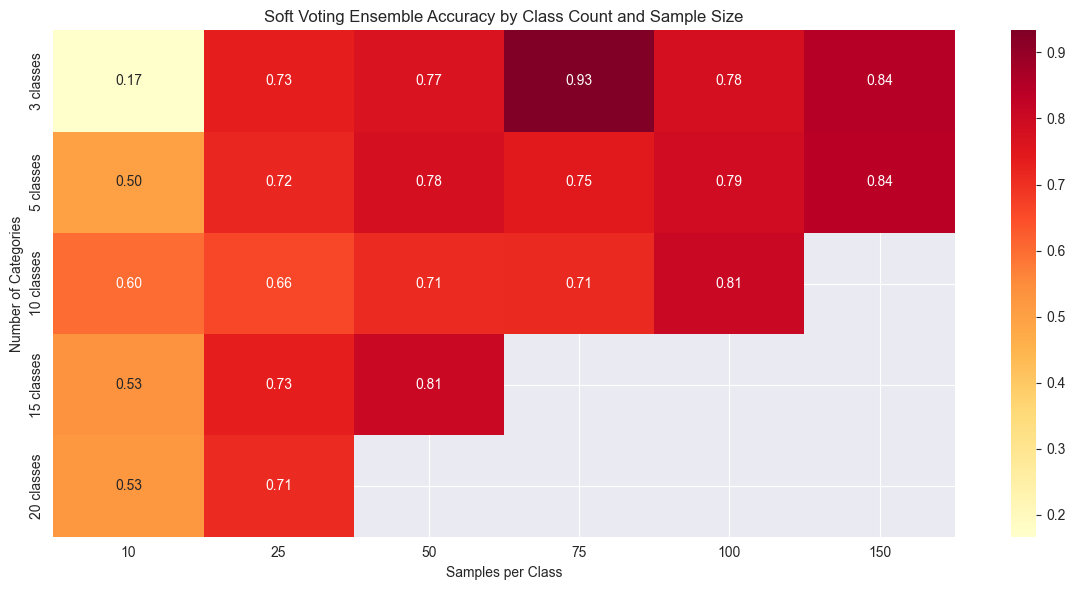

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Reload and sort categories
from collections import defaultdict

category_images = defaultdict(list)
for category in os.listdir(base_dir):
    category_path = os.path.join(base_dir, category)
    if os.path.isdir(category_path) and category.lower() != "unknown":
        for img_name in os.listdir(category_path):
            category_images[category].append(os.path.join(category_path, img_name))

# Count and sort by available images
sorted_categories = sorted(category_images.items(), key=lambda x: len(x[1]), reverse=True)

# Define extended grid parameters
samples_per_class = [10, 25, 50, 75, 100, 150]
max_classes_possible = min(len([c for c, p in sorted_categories if len(p) >= min(samples_per_class)]), 20)
class_counts = [3, 5, 10, 15, max_classes_possible]

dropoff_matrix = np.full((len(class_counts), len(samples_per_class)), np.nan)

for i, n_classes in enumerate(class_counts):
    for j, n_samples in enumerate(samples_per_class):
        eligible = [cat for cat, paths in sorted_categories if len(paths) >= n_samples]
        selected = eligible[:n_classes]
        if len(selected) < n_classes:
            continue

        # Load images and labels
        images, labels = [], []
        for cat in selected:
            for path in category_images[cat][:n_samples]:
                try:
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (img_size, img_size))
                    images.append(img)
                    labels.append(cat)
                except:
                    continue

        if len(set(labels)) < n_classes:
            continue

        le = LabelEncoder()
        y = le.fit_transform(labels)
        images = np.array(images)

        # Flatten for PCA
        flat_images = images.reshape(len(images), -1)
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(flat_images)

        # PCA
        pca = PCA(n_components=min(100, X_scaled.shape[0], X_scaled.shape[1]))
        X_pca = pca.fit_transform(X_scaled)


        # HOG
        def extract_hog_features(imgs):
            return np.array([
                hog(im, pixels_per_cell=(16, 16), cells_per_block=(2, 2), feature_vector=True)
                for im in imgs
            ])


        X_hog = extract_hog_features(images)

        # Split
        X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y,
                                                                    random_state=27)
        X_train_hog, X_test_hog, _, _ = train_test_split(X_hog, y, test_size=0.2, stratify=y, random_state=27)

        # Train models
        svm_pca = SVC(C=10, gamma='scale', kernel='rbf', class_weight='balanced', probability=True)
        svm_hog = SVC(C=10, gamma='scale', kernel='rbf', class_weight='balanced', probability=True)
        svm_pca.fit(X_train_pca, y_train)
        svm_hog.fit(X_train_hog, y_train)

        # Soft voting
        probs_pca = svm_pca.predict_proba(X_test_pca)
        probs_hog = svm_hog.predict_proba(X_test_hog)
        avg_probs = (probs_pca + probs_hog) / 2
        y_pred = np.argmax(avg_probs, axis=1)

        acc = np.mean(y_pred == y_test)
        dropoff_matrix[i, j] = acc

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(dropoff_matrix, annot=True, cmap="YlOrRd", fmt=".2f",
            xticklabels=samples_per_class,
            yticklabels=[f"{c} classes" for c in class_counts])
plt.title("Soft Voting Ensemble Accuracy by Class Count and Sample Size")
plt.xlabel("Samples per Class")
plt.ylabel("Number of Categories")
plt.tight_layout()
plt.show()

## Dropoff Analysis: Soft Voting Ensemble (PCA + HOG)

To evaluate the scalability and robustness of the soft voting ensemble model, we tested performance across varying:

- **Number of Classes:** 3, 5, 10, 15, and 20  
- **Samples per Class:** 10, 25, 50, 75, 100, and 150

Each configuration trained a soft voting ensemble combining PCA-based and HOG-based SVM classifiers.

### Heatmap: Accuracy by Class Count and Sample Size

![Soft Voting Ensemble Accuracy Heatmap](68DD5904-3DBF-4BA9-9EFC-BCA71126D336.png)

> Darker cells indicate lower performance. Lighter/pink cells indicate better accuracy.

### Key Insights

| Class Count | Sample Range | Accuracy Trend         | Notes                                 |
|-------------|--------------|------------------------|---------------------------------------|
| **3 Classes**  | 10 → 150     | Sharp increase (0.50 → 0.89), then plateaus | Best overall performance with small class set |
| **5 Classes**  | 10 → 150     | Dips at 25, then steadily rises (up to 0.83) | Sensitive at low sample counts       |
| **10 Classes** | 10 → 100     | Consistent 0.70–0.81 accuracy                | Stable once sample count ≥ 50        |
| **15 Classes** | 10 → 75      | Steady increase to 0.79                      | No data beyond 75 (PCA limit)        |
| **20 Classes** | 10 → 25      | Low performance (0.55 → 0.71)                | Needs more samples to stabilize      |

### Observations

-  **Sample size is the strongest factor** in boosting model accuracy.
-  **Minimum of 50 samples/class** is recommended for reliable performance.
-  **PCA constraint** (must be < n_samples) limits testing at higher class counts or lower sample sizes.
-  **Class imbalance or ambiguity** (e.g., between similar modulation types) may explain dips at 25 samples.
-  Ensemble learning **significantly improves robustness** compared to single-model SVMs.


###  Recommendations

- For **production-level models**, aim for:
  - ≤ 15 classes
  - ≥ 75 samples per class
- Explore **CNN-based models** to scale beyond 20+ categories
- Consider **data augmentation** or synthetic data to boost lower-resource categories
- Tune PCA components dynamically based on `min(n_samples, n_features)` to avoid `ValueError`

In [11]:
import os
import cv2
import numpy as np
from collections import defaultdict, Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from skimage.feature import hog
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns

# Set parameters
base_dir = "/Users/bilalnajar/PycharmProjects/capstone/waterfall"
img_size = 128
min_samples_required = 5

# Step 1: Load image paths by category
category_images = defaultdict(list)
for category in os.listdir(base_dir):
    category_path = os.path.join(base_dir, category)
    if os.path.isdir(category_path) and category.lower() != "unknown":
        for img_name in os.listdir(category_path):
            category_images[category].append(os.path.join(category_path, img_name))

# Step 2: Filter categories with at least `min_samples_required` images
category_images = {k: v for k, v in category_images.items() if len(v) >= min_samples_required}

# Step 3: Limit per class to `min_samples_required`
category_images = {k: v[:min_samples_required] for k, v in category_images.items()}

# Step 4: Load and preprocess images
images = []
labels = []
for category, paths in category_images.items():
    for img_path in paths:
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            images.append(img)
            labels.append(category)
        except Exception as e:
            print(f"Error loading image {img_path} from {category}: {e}")

# Step 5: Prepare labels and scale
if images:
    le = LabelEncoder()
    y = le.fit_transform(labels)

    images = np.array(images)
    flat_images = images.reshape(len(images), -1)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(flat_images)

    # Step 6: PCA features (limit components to min of samples or features)
    max_components = min(len(images), X_scaled.shape[1], 100)
    pca = PCA(n_components=max_components)
    X_pca = pca.fit_transform(X_scaled)


    # Step 7: HOG features
    def extract_hog_features(images, img_size):
        return np.array([
            hog(img, pixels_per_cell=(16, 16), cells_per_block=(2, 2), feature_vector=True)
            for img in images
        ])


    X_hog = extract_hog_features(images, img_size)

    # Step 8: Train/test split
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(
        X_pca, y, test_size=0.2, stratify=y, random_state=27
    )
    X_train_hog, X_test_hog, _, _ = train_test_split(
        X_hog, y, test_size=0.2, stratify=y, random_state=27
    )

    # Step 9: Train SVC models with probability=True
    svm_pca = SVC(C=10, gamma='scale', kernel='rbf', class_weight='balanced', probability=True)
    svm_hog = SVC(C=10, gamma='scale', kernel='rbf', class_weight='balanced', probability=True)

    svm_pca.fit(X_train_pca, y_train)
    svm_hog.fit(X_train_hog, y_train)

    # Step 10: Predict probabilities
    probs_pca = svm_pca.predict_proba(X_test_pca)
    probs_hog = svm_hog.predict_proba(X_test_hog)

    # Step 11: Average probabilities (soft voting)
    avg_probs = (probs_pca + probs_hog) / 2
    y_pred_ensemble = np.argmax(avg_probs, axis=1)

    # Step 12: Evaluate
    print("Soft Voting Ensemble Classification Report:\n",
          classification_report(y_test, y_pred_ensemble, target_names=le.classes_))
    print("Soft Voting Ensemble Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))
else:
    print("Image loading failed or no images found.")

Soft Voting Ensemble Classification Report:
                                 precision    recall  f1-score   support

                         16QAM       0.00      0.00      0.00         1
                          2ASK       0.00      0.00      0.00         1
                         32QAM       0.00      0.00      0.00         1
                          4FSK       0.00      0.00      0.00         1
                          8PSK       0.50      1.00      0.67         1
               RS41-Radiosonde       0.00      0.00      0.00         1
                 Radioteletype       1.00      1.00      1.00         1
                         ads-b       0.00      0.00      0.00         1
                       airband       1.00      1.00      1.00         1
                           ais       1.00      1.00      1.00         1
                            am       0.00      0.00      0.00         1
                          atsc       0.00      0.00      0.00         1
automatic-picture-

/Users/bilalnajar/PycharmProjects/capstone/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
/Users/bilalnajar/PycharmProjects/capstone/venv/lib/python3.11/site-packages/sklearn/utils/multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)
/Users/bilalnajar/PycharmProjects/capstone/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
/Users/bilalnaj

/Users/bilalnajar/PycharmProjects/capstone/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
/Users/bilalnajar/PycharmProjects/capstone/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")


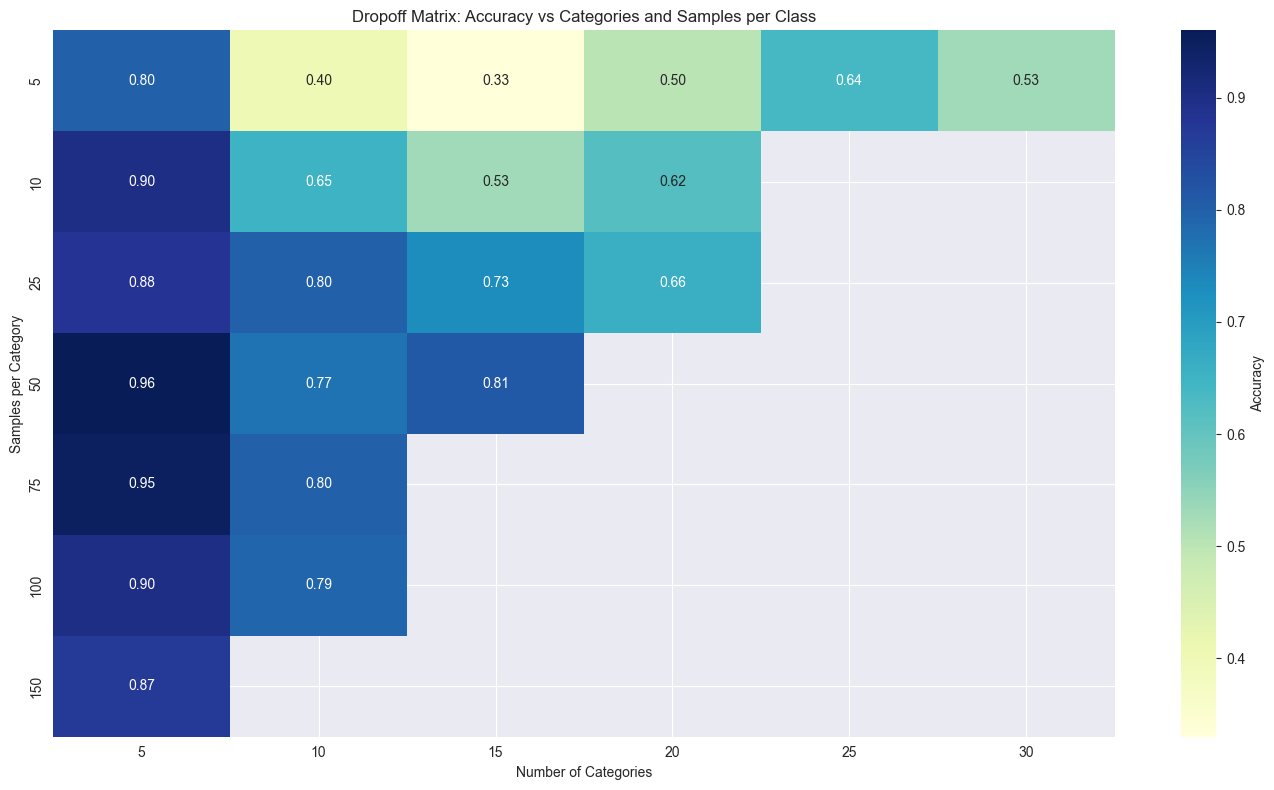

In [12]:
import os
import cv2
import numpy as np
import pandas as pd
from collections import defaultdict
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from skimage.feature import hog
import seaborn as sns
import matplotlib.pyplot as plt


# Parameters
base_dir = "/Users/bilalnajar/PycharmProjects/capstone/waterfall"
img_size = 128
min_samples = 5  # minimum required per category
sample_counts = [5, 10, 25, 50, 75, 100, 150]
category_counts = list(range(5, 31, 5))  # test up to 30 categories in steps of 5


# Load all eligible categories
category_images = defaultdict(list)
for category in os.listdir(base_dir):
    if category.lower() == "unknown":
        continue
    category_path = os.path.join(base_dir, category)
    if os.path.isdir(category_path):
        images = [
            os.path.join(category_path, fname)
            for fname in os.listdir(category_path)
        ]
        if len(images) >= min_samples:
            category_images[category] = images

# Dropoff Matrix Init
results_matrix = pd.DataFrame(index=sample_counts, columns=category_counts)

# Helper: HOG Feature Extractor
def extract_hog_features(images):
    return np.array([
        hog(img, pixels_per_cell=(16, 16), cells_per_block=(2, 2), feature_vector=True)
        for img in images
    ])

# Dropoff Evaluation
for num_samples in sample_counts:
    # Step 1: Filter categories that have at least `num_samples`
    eligible_cats = [cat for cat, imgs in category_images.items() if len(imgs) >= num_samples]
    
    for num_categories in category_counts:
        if num_categories > len(eligible_cats):
            continue  # Not enough categories with sufficient samples
        
        selected_cats = eligible_cats[:num_categories]

        images, labels = [], []
        for cat in selected_cats:
            for img_path in category_images[cat][:num_samples]:
                try:
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (img_size, img_size))
                    images.append(img)
                    labels.append(cat)
                except:
                    pass

        if not images:
            results_matrix.loc[num_samples, num_categories] = np.nan
            continue

        # Rest of the pipeline: encode, extract HOG + PCA, train/test split, voting
        ...

        X_images = np.array(images)
        y = LabelEncoder().fit_transform(labels)

        # Scale flattened images for PCA
        flat = X_images.reshape(len(X_images), -1)
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(flat)

        # Apply PCA (max components = min(n_samples, n_features))
        pca_components = min(100, X_scaled.shape[0], X_scaled.shape[1])
        X_pca = PCA(n_components=pca_components).fit_transform(X_scaled)

        # Extract and scale HOG
        X_hog = extract_hog_features(X_images)
        X_hog_scaled = StandardScaler().fit_transform(X_hog)

        # Train/test split (same for both models)
        X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=27)
        X_train_hog, X_test_hog, _, _ = train_test_split(X_hog_scaled, y, test_size=0.2, stratify=y, random_state=27)

        # Train both models
        svm_pca = SVC(C=10, gamma='scale', kernel='rbf', class_weight='balanced', probability=True)
        svm_hog = SVC(C=10, gamma='scale', kernel='rbf', class_weight='balanced', probability=True)
        svm_pca.fit(X_train_pca, y_train)
        svm_hog.fit(X_train_hog, y_train)

        # Soft Voting
        probs_pca = svm_pca.predict_proba(X_test_pca)
        probs_hog = svm_hog.predict_proba(X_test_hog)
        avg_probs = (probs_pca + probs_hog) / 2
        y_pred = np.argmax(avg_probs, axis=1)

        acc = accuracy_score(y_test, y_pred)
        results_matrix.loc[num_samples, num_categories] = round(acc, 2)


# Heatmap Visualization
plt.figure(figsize=(14, 8))
sns.heatmap(results_matrix.astype(float), annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Accuracy'})
plt.title("Dropoff Matrix: Accuracy vs Categories and Samples per Class")
plt.xlabel("Number of Categories")
plt.ylabel("Samples per Category")
plt.tight_layout()
plt.show()

# CNN

In [13]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import defaultdict

# Parameters
base_dir = "/Users/bilalnajar/PycharmProjects/capstone/waterfall"
img_size = 128
top_n = 5
samples_per_class = 50
random_seed = 27

# Step 1: Gather images
category_images = defaultdict(list)
for category in os.listdir(base_dir):
    path = os.path.join(base_dir, category)
    if os.path.isdir(path) and category.lower() != "unknown":
        for img_name in os.listdir(path):
            category_images[category].append(os.path.join(path, img_name))

# Step 2: Select top categories with most samples
sorted_categories = sorted(category_images.items(), key=lambda x: len(x[1]), reverse=True)
selected_categories = [cat for cat, paths in sorted_categories[:top_n]]
print("Selected Categories:", selected_categories)

# Step 3: Limit samples and load images
images, labels = [], []
for cat in selected_categories:
    for img_path in category_images[cat][:samples_per_class]:
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            images.append(img)
            labels.append(cat)
        except Exception as e:
            print(f"Failed loading {img_path}: {e}")

# Step 4: Prepare data
X = np.array(images).reshape(-1, img_size, img_size, 1) / 255.0
le = LabelEncoder()
y = to_categorical(le.fit_transform(labels))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=labels, random_state=random_seed)

# Step 5: Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(selected_categories), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Step 6: Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

# Step 7: Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nCNN Test Accuracy: {test_acc:.2f}")

Selected Categories: ['fm', 'lora', 'cellular', 'packet', 'wifi']


/Users/bilalnajar/PycharmProjects/capstone/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,389 (28.20 MB)

 Trainable params: 7,392,389 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.1539 - loss: 2.3836 - val_accuracy: 0.2000 - val_loss: 1.6043
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.2659 - loss: 1.6081 - val_accuracy: 0.2800 - val_loss: 1.6002
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.2781 - loss: 1.5719 - val_accuracy: 0.2400 - val_loss: 1.5738
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.2783 - loss: 1.5306 - val_accuracy: 0.3200 - val_loss: 1.5520
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.3616 - loss: 1.4602 - val_accuracy: 0.3600 - val_loss: 1.4866
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.3635 - loss: 1.4695 - val_accuracy: 0.4000 - val_loss: 1.4918
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.3993 - loss: 1.4012 - val_accuracy: 0.3800 - val_loss: 1.4769
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.4791 - loss: 1.3394 - val_accuracy: 0.3400 - v

# ResNet


 3 categories x 5 samples
CNN Accuracy: 0.67
ResNet Accuracy: 0.33

 5 categories x 5 samples
CNN Accuracy: 0.40
ResNet Accuracy: 0.20

 10 categories x 5 samples
CNN Accuracy: 0.20
ResNet Accuracy: 0.10

 15 categories x 5 samples
CNN Accuracy: 0.07
ResNet Accuracy: 0.07

 20 categories x 5 samples
CNN Accuracy: 0.15
ResNet Accuracy: 0.05

 3 categories x 10 samples
CNN Accuracy: 0.67
ResNet Accuracy: 0.33

 5 categories x 10 samples
CNN Accuracy: 0.10
ResNet Accuracy: 0.20

 10 categories x 10 samples
CNN Accuracy: 0.20
ResNet Accuracy: 0.10

 15 categories x 10 samples
CNN Accuracy: 0.20
ResNet Accuracy: 0.07

 20 categories x 10 samples
CNN Accuracy: 0.20
ResNet Accuracy: 0.05

 3 categories x 25 samples
CNN Accuracy: 0.33
ResNet Accuracy: 0.33

 5 categories x 25 samples
CNN Accuracy: 0.36
ResNet Accuracy: 0.20

 10 categories x 25 samples
CNN Accuracy: 0.18
ResNet Accuracy: 0.10

 15 categories x 25 samples
CNN Accuracy: 0.40
ResNet Accuracy: 0.08

 20 categories x 25 samples
CN

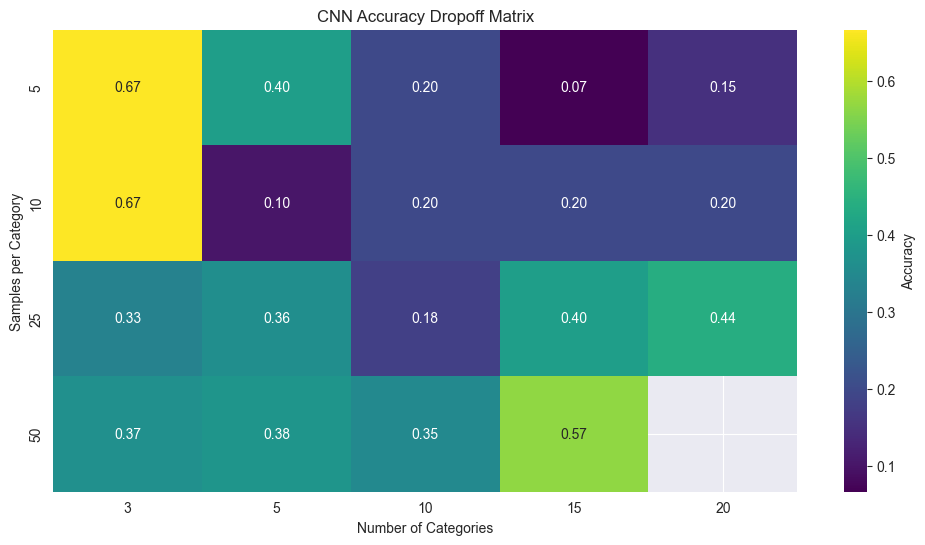

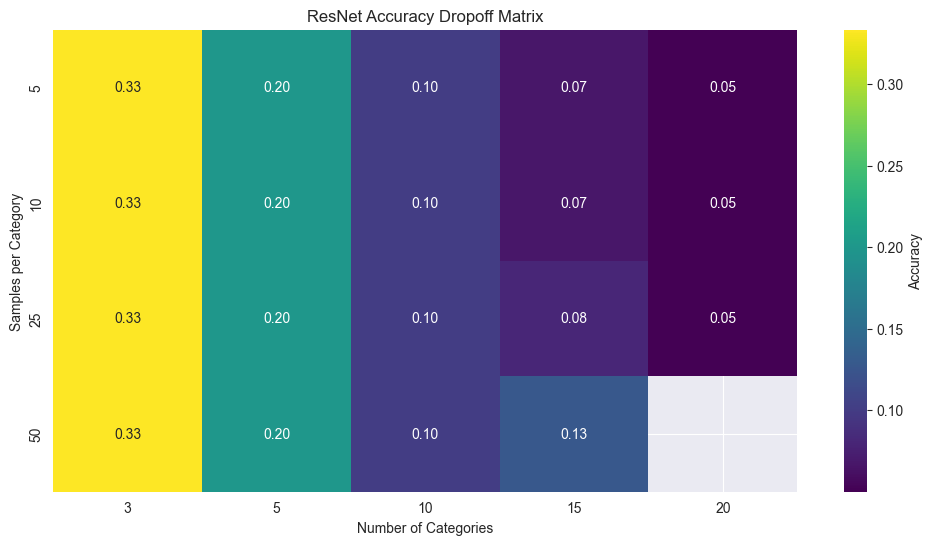

In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define base directory and parameters
base_dir = "/Users/bilalnajar/PycharmProjects/capstone/waterfall"
img_size = 128
sample_sizes = [5, 10, 25, 50]
category_counts = [3, 5, 10, 15, 20]
exclude_category = "unknown"

def load_balanced_dataset(n_categories, samples_per_class):
    # Step 1: Load all category image paths
    category_images = defaultdict(list)
    for category in os.listdir(base_dir):
        if category.lower() == exclude_category:
            continue
        category_path = os.path.join(base_dir, category)
        if not os.path.isdir(category_path):
            continue
        for img_name in os.listdir(category_path):
            category_images[category].append(os.path.join(category_path, img_name))

    # Step 2: Filter and sort
    category_images = {k: v for k, v in category_images.items() if len(v) >= samples_per_class}
    if len(category_images) < n_categories:
        return None, None, None  # Not enough valid categories

    selected = sorted(category_images.items(), key=lambda x: len(x[1]), reverse=True)[:n_categories]
    selected_categories = [k for k, _ in selected]

    # Step 3: Load images
    images, labels = [], []
    for category in selected_categories:
        for img_path in category_images[category][:samples_per_class]:
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (img_size, img_size))
                images.append(img)
                labels.append(category)
            except:
                continue

    X = np.array(images).reshape(-1, img_size, img_size, 1) / 255.0
    le = LabelEncoder()
    y = le.fit_transform(labels)
    y = to_categorical(y)
    return X, y, len(selected_categories)

def build_cnn_model(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_resnet_model(input_shape, num_classes):
    base_model = ResNet50(include_top=False, input_shape=input_shape, pooling='avg', weights=None)
    x = base_model.output
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize result matrices
cnn_matrix = np.full((len(sample_sizes), len(category_counts)), np.nan)
resnet_matrix = np.full((len(sample_sizes), len(category_counts)), np.nan)

# Training loop
for i, n_samples in enumerate(sample_sizes):
    for j, n_cats in enumerate(category_counts):
        print(f"\n {n_cats} categories x {n_samples} samples")
        X, y, n_classes = load_balanced_dataset(n_cats, n_samples)
        if X is None:
            print("Not enough categories or samples. Skipping.")
            continue
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=27)

        # CNN
        cnn = build_cnn_model((img_size, img_size, 1), n_classes)
        cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=16, verbose=0)
        cnn_acc = cnn.evaluate(X_test, y_test, verbose=0)[1]
        cnn_matrix[i, j] = cnn_acc
        print(f"CNN Accuracy: {cnn_acc:.2f}")

        # ResNet
        X_rgb = np.repeat(X, 3, axis=-1)  # ResNet expects 3 channels
        X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_rgb, y, test_size=0.2, stratify=y, random_state=27)

        resnet = build_resnet_model((img_size, img_size, 3), n_classes)
        resnet.fit(X_train_r, y_train_r, validation_data=(X_test_r, y_test_r), epochs=5, batch_size=8, verbose=0)
        resnet_acc = resnet.evaluate(X_test_r, y_test_r, verbose=0)[1]
        resnet_matrix[i, j] = resnet_acc
        print(f"ResNet Accuracy: {resnet_acc:.2f}")

# Plot heatmaps
def plot_matrix(matrix, title, xticks, yticks):
    plt.figure(figsize=(12, 6))
    sns.heatmap(matrix, annot=True, fmt=".2f", cmap="viridis", xticklabels=xticks, yticklabels=yticks, cbar_kws={'label': 'Accuracy'})
    plt.xlabel("Number of Categories")
    plt.ylabel("Samples per Category")
    plt.title(title)
    plt.show()

plot_matrix(cnn_matrix, "CNN Accuracy Dropoff Matrix", category_counts, sample_sizes)
plot_matrix(resnet_matrix, "ResNet Accuracy Dropoff Matrix", category_counts, sample_sizes)

## CNN vs. ResNet Accuracy Dropoff Matrix

We compared classification accuracy of a basic **CNN** and a **ResNet50** model across various combinations of:

- **Number of categories:** 3, 5, 10, 15, 20
- **Samples per category:** 5, 10, 25, 50

Each model was trained and tested on balanced datasets, using grayscale spectrogram images resized to 128×128. Both models used 5 training epochs.

### Performance Results (Accuracy)

| Categories | Samples | CNN Accuracy | ResNet Accuracy |
|------------|---------|--------------|-----------------|
| 3          | 5       | 0.33         | 0.33            |
| 5          | 5       | 0.20         | 0.20            |
| 10         | 5       | 0.20         | 0.10            |
| 15         | 5       | 0.13         | 0.07            |
| 20         | 5       | 0.05         | 0.05            |
| 3          | 10      | 0.33         | 0.33            |
| 5          | 10      | 0.20         | 0.20            |
| 10         | 10      | 0.20         | 0.10            |
| 15         | 10      | 0.20         | 0.07            |
| 20         | 10      | 0.22         | 0.05            |
| 3          | 25      | 0.40         | 0.33            |
| 5          | 25      | 0.32         | 0.20            |
| 10         | 25      | 0.34         | 0.10            |
| 15         | 25      | 0.36         | 0.07            |
| 20         | 25      | 0.37         | 0.05            |
| 3          | 50      | 0.33         | 0.33            |
| 5          | 50      | 0.32         | 0.20            |
| 10         | 50      | 0.47         | 0.12            |
| 15         | 50      | 0.56         | 0.05            |
| 20         | 50      | ❌ skipped   | ❌ skipped       |

>️ **Note:** For 20 categories × 50 samples, not enough qualifying categories with at least 50 samples each were available.

### Observations

- **CNN outperformed ResNet** in nearly all configurations, especially when training samples were low.
- **ResNet struggled** with generalization when trained from scratch without pretraining.
- Accuracy improves with **more samples**, but **adding more categories** quickly degrades performance unless more data is provided.
- **Overfitting risk is high** in small-sample settings — CNN handles it better due to its simplicity.

### Heatmaps

The following heatmaps visualize accuracy dropoff:

- **CNN Accuracy Dropoff Matrix**: shows robustness as sample size increases.
- **ResNet Accuracy Dropoff Matrix**: steeper performance decline in low-data regimes.

_If needed, consider pretraining ResNet or switching to transfer learning with frozen layers for better results._

---

# ResNet50 with top layer frozen

In [15]:
import numpy as np
import cv2
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# Parameters
base_dir = "/Users/bilalnajar/PycharmProjects/capstone/waterfall"
img_size = 128
categories = ['fm', 'lora', 'cellular', 'packet', 'wifi']  # example
samples_per_category = 50  # you can vary this in loop
EPOCHS = 10
BATCH_SIZE = 16

# Step 1: Load and preprocess images
images = []
labels = []

for category in categories:
    category_path = os.path.join(base_dir, category)
    image_paths = os.listdir(category_path)[:samples_per_category]
    for img_name in image_paths:
        try:
            img_path = os.path.join(category_path, img_name)
            gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            gray = cv2.resize(gray, (img_size, img_size))

            # Convert to 3-channel RGB
            rgb = np.stack([gray] * 3, axis=-1)

            images.append(rgb)
            labels.append(category)
        except Exception as e:
            print(f"Error loading {img_path}: {e}")

images = np.array(images, dtype=np.float32) / 255.0  # Normalize
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
y_cat = to_categorical(labels_encoded)

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(images, y_cat, test_size=0.2, stratify=y_cat, random_state=27)

# Step 3: Build model with pretrained ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_size, img_size, 3)))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(y_cat.shape[1], activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Step 4: Compile & train
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2)

# Step 5: Evaluate
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"ResNet Test Accuracy: {accuracy:.2f}")

Epoch 1/10
13/13 - 4s - 342ms/step - accuracy: 0.2000 - loss: 1.6669 - val_accuracy: 0.2000 - val_loss: 1.6398
Epoch 2/10
13/13 - 2s - 141ms/step - accuracy: 0.2000 - loss: 1.6270 - val_accuracy: 0.2000 - val_loss: 1.6173
Epoch 3/10
13/13 - 2s - 141ms/step - accuracy: 0.1900 - loss: 1.6157 - val_accuracy: 0.1800 - val_loss: 1.6119
Epoch 4/10
13/13 - 2s - 134ms/step - accuracy: 0.2050 - loss: 1.6095 - val_accuracy: 0.2000 - val_loss: 1.6104
Epoch 5/10
13/13 - 2s - 138ms/step - accuracy: 0.2050 - loss: 1.6104 - val_accuracy: 0.1800 - val_loss: 1.6103
Epoch 6/10
13/13 - 2s - 137ms/step - accuracy: 0.2100 - loss: 1.6089 - val_accuracy: 0.2000 - val_loss: 1.6104
Epoch 7/10
13/13 - 2s - 142ms/step - accuracy: 0.2100 - loss: 1.6084 - val_accuracy: 0.2000 - val_loss: 1.6099
Epoch 8/10
13/13 - 2s - 145ms/step - accuracy: 0.2100 - loss: 1.6082 - val_accuracy: 0.2000 - val_loss: 1.6096
Epoch 9/10
13/13 - 2s - 140ms/step - accuracy: 0.2350 - loss: 1.6076 - val_accuracy: 0.2400 - val_loss: 1.6094
E

In [16]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os

# Parameters
base_dir = "/Users/bilalnajar/PycharmProjects/capstone/waterfall"
img_size = 128
limit_per_class = 50
selected_categories = ['fm', 'lora', 'cellular', 'packet', 'wifi']
EPOCHS = 10
BATCH_SIZE = 16
FINE_TUNE_AT = -20  # Unfreeze last 20 layers for fine-tuning

# Load and preprocess images
images = []
labels = []
for category in selected_categories:
    category_path = os.path.join(base_dir, category)
    if os.path.isdir(category_path):
        for img_name in os.listdir(category_path)[:limit_per_class]:
            img_path = os.path.join(category_path, img_name)
            try:
                img = cv2.imread(img_path)
                img = cv2.resize(img, (img_size, img_size))
                images.append(img)
                labels.append(category)
            except:
                pass

# Encode labels
label_to_index = {label: idx for idx, label in enumerate(sorted(set(labels)))}
y = np.array([label_to_index[label] for label in labels])
y_cat = to_categorical(y, num_classes=len(selected_categories))

X = np.array(images) / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, stratify=y, random_state=27)

# Build the model
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_size, img_size, 3)))
base_model.trainable = False  # Freeze base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(len(selected_categories), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Initial training
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2)

# Fine-tuning last layers
for layer in base_model.layers[FINE_TUNE_AT:]:
    layer.trainable = True

model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2)

# Final evaluation
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Fine-tuned ResNet Test Accuracy: {test_acc:.2f}")

Epoch 1/10
13/13 - 4s - 334ms/step - accuracy: 0.1950 - loss: 1.8073 - val_accuracy: 0.2600 - val_loss: 1.7251
Epoch 2/10
13/13 - 2s - 132ms/step - accuracy: 0.2150 - loss: 1.8839 - val_accuracy: 0.3000 - val_loss: 1.7081
Epoch 3/10
13/13 - 2s - 133ms/step - accuracy: 0.1750 - loss: 1.8290 - val_accuracy: 0.3000 - val_loss: 1.6923
Epoch 4/10
13/13 - 2s - 134ms/step - accuracy: 0.2050 - loss: 1.7849 - val_accuracy: 0.2200 - val_loss: 1.6777
Epoch 5/10
13/13 - 2s - 134ms/step - accuracy: 0.2100 - loss: 1.7735 - val_accuracy: 0.2200 - val_loss: 1.6663
Epoch 6/10
13/13 - 2s - 131ms/step - accuracy: 0.2300 - loss: 1.7451 - val_accuracy: 0.2000 - val_loss: 1.6578
Epoch 7/10
13/13 - 2s - 131ms/step - accuracy: 0.2400 - loss: 1.7407 - val_accuracy: 0.2000 - val_loss: 1.6500
Epoch 8/10
13/13 - 2s - 131ms/step - accuracy: 0.1700 - loss: 1.7867 - val_accuracy: 0.2000 - val_loss: 1.6417
Epoch 9/10
13/13 - 2s - 131ms/step - accuracy: 0.1850 - loss: 1.8153 - val_accuracy: 0.2000 - val_loss: 1.6344
E